# Data Preprocessing

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('olympics2024.csv')

# Display the first few rows of the dataset
print("Initial Data:")
display(df.head())

Initial Data:


,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [3]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64


In [4]:
# Check data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Rank             int64
Country         object
Country Code    object
Gold             int64
Silver           int64
Bronze           int64
Total            int64
dtype: object


In [5]:
# Preprocessing steps:
# 1. Ensure correct data types
df['Gold'] = df['Gold'].astype(int)
df['Silver'] = df['Silver'].astype(int)
df['Bronze'] = df['Bronze'].astype(int)
df['Total'] = df['Total'].astype(int)

# 2. Feature engineering: calculating percentages of total medals
df['Gold_Percentage'] = (df['Gold'] / df['Total']) * 100
df['Silver_Percentage'] = (df['Silver'] / df['Total']) * 100
df['Bronze_Percentage'] = (df['Bronze'] / df['Total']) * 100

# Save the cleaned data
df.to_csv('cleaned_data.csv', index=False)

# Display the cleaned data
print("\nCleaned Data:")
display(df.head())


Cleaned Data:


,Rank,Country,Country Code,Gold,Silver,Bronze,Total,Gold_Percentage,Silver_Percentage,Bronze_Percentage
0,1,United States,US,40,44,42,126,31.746032,34.920635,33.333333
1,2,China,CHN,40,27,24,91,43.956044,29.670330,26.373626
2,3,Japan,JPN,20,12,13,45,44.444444,26.666667,28.888889
3,4,Australia,AUS,18,19,16,53,33.962264,35.849057,30.188679
4,5,France,FRA,16,26,22,64,25.000000,40.625000,34.375000


# Analysis 1: Descriptive Statistics

In [6]:
# Descriptive statistics to understand the distribution of medals
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Descriptive statistics
print("Descriptive Statistics:")
display(df.describe())

Descriptive Statistics:


,Rank,Gold,Silver,Bronze,Total,Gold_Percentage,Silver_Percentage,Bronze_Percentage
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582,26.450146,29.607559,43.942295
std,25.652244,6.990278,6.770816,6.558798,19.702829,23.538853,26.866083,30.357382
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,25.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000,25.000000,28.571429,40.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000,43.406593,42.857143,61.250000
max,84.000000,40.000000,44.000000,42.000000,126.000000,100.000000,100.000000,100.000000


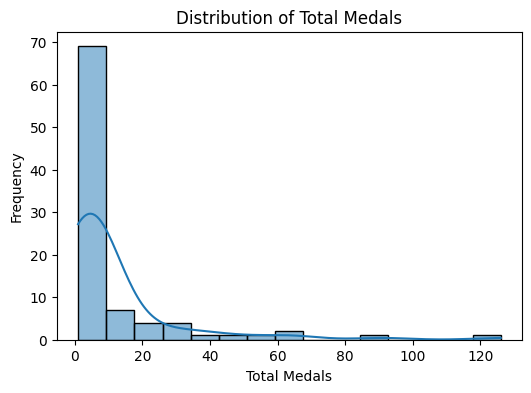

In [7]:
# Visualization: Distribution of Total Medals
plt.figure(figsize=(6, 4))
sns.histplot(df['Total'], kde=True, bins=15)
plt.title('Distribution of Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Frequency')

plt.savefig('distribution.png')
plt.show()

# Analysis 2: Correlation Analysis

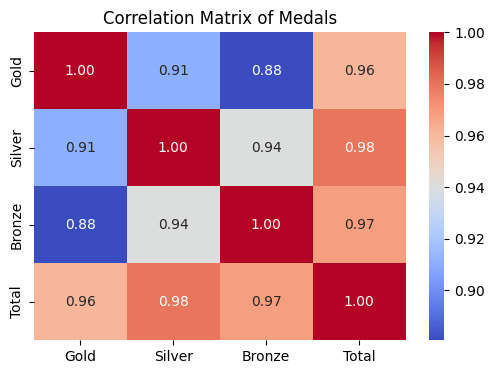

In [8]:
# Correlation analysis to identify relationships between variables
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Correlation matrix
corr_matrix = df[['Gold', 'Silver', 'Bronze', 'Total']].corr()

# Visualization: Heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Medals')

plt.savefig('correlation_matrix.png')
plt.show()

# Analysis 3: Clustering (K-Means)

c:\Users\DHRUV\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


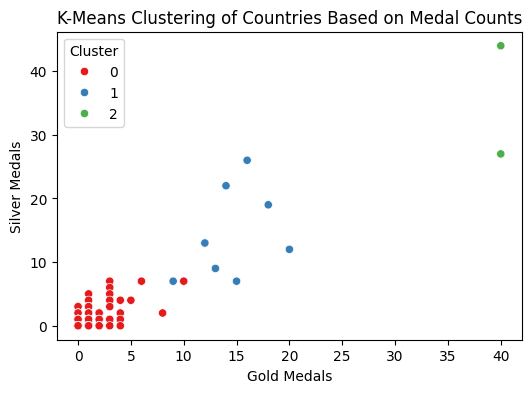

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Select features for clustering
X = df[['Gold', 'Silver', 'Bronze']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualization: Clustered data
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Gold', y='Silver', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering of Countries Based on Medal Counts')
plt.xlabel('Gold Medals')
plt.ylabel('Silver Medals')
plt.savefig('clustering_result.png')
plt.show()

# Report Generation

In [10]:
!pip install fpdf

In [33]:
df = pd.read_csv('cleaned_data.csv')
summary = df.describe()

print(summary)

            Rank       Gold     Silver     Bronze       Total  \
count  91.000000  91.000000  91.000000  91.000000   91.000000   
mean   45.307692   3.604396   3.593407   4.219780   11.417582   
std    25.652244   6.990278   6.770816   6.558798   19.702829   
min     1.000000   0.000000   0.000000   0.000000    1.000000   
25%    23.500000   0.000000   0.000000   1.000000    2.000000   
50%    44.000000   1.000000   1.000000   2.000000    5.000000   
75%    68.000000   3.000000   3.000000   5.000000    9.000000   
max    84.000000  40.000000  44.000000  42.000000  126.000000   

       Gold_Percentage  Silver_Percentage  Bronze_Percentage  
count        91.000000          91.000000          91.000000  
mean         26.450146          29.607559          43.942295  
std          23.538853          26.866083          30.357382  
min           0.000000           0.000000           0.000000  
25%           0.000000           0.000000          25.000000  
50%          25.000000          28.5

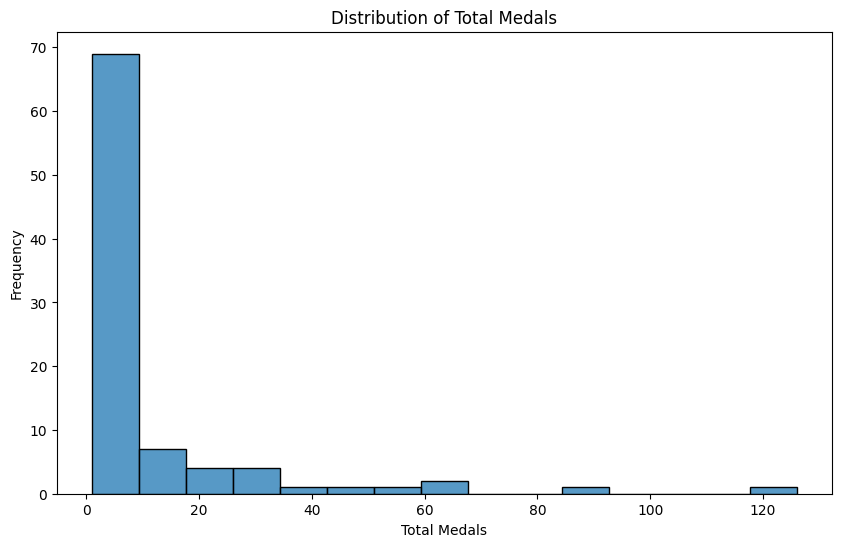

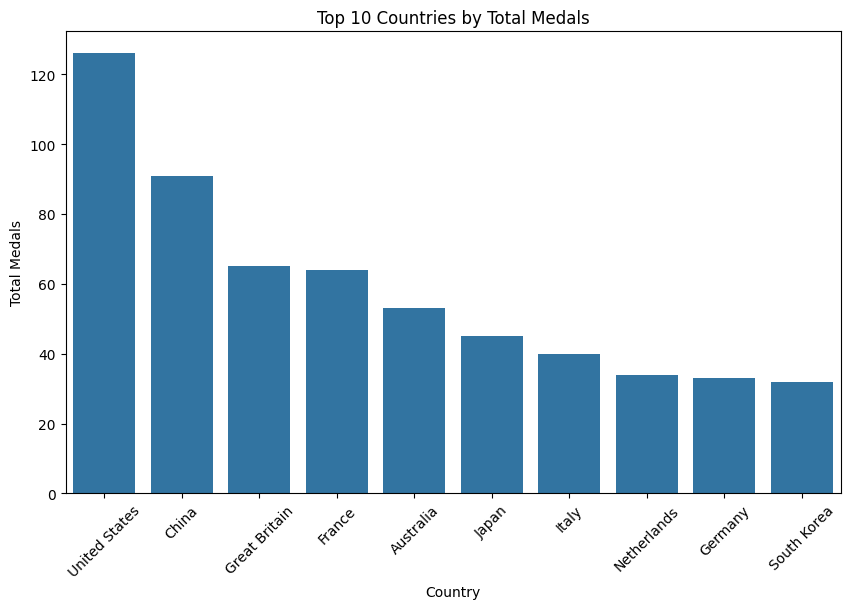

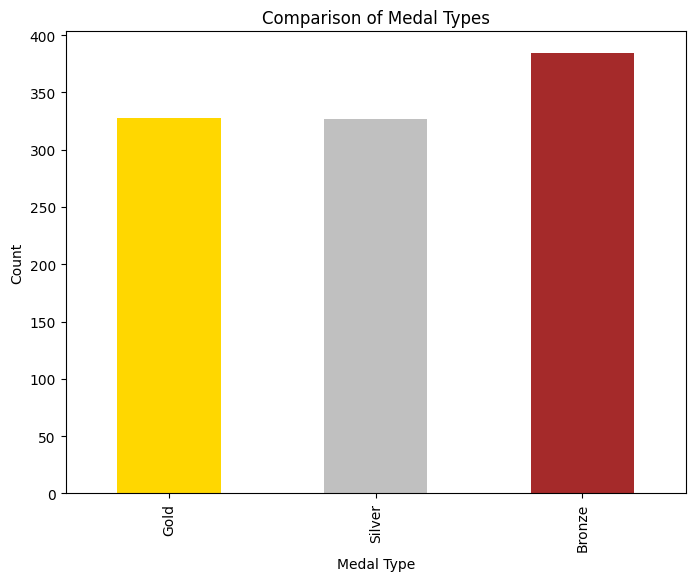

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


d:\Development\Machine learning\Assignments\System Altruism\notebooks\analysis_report.pdf

In [37]:
from IPython.display import FileLink
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF
from transformers import pipeline

# Load the data
df = pd.read_csv('cleaned_data.csv')
summary_df = df.describe()

# 1. Distribution Analysis of Total Medals
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], kde=False, bins=15)
plt.title('Distribution of Total Medals')
plt.xlabel('Total Medals')
plt.ylabel('Frequency')
plt.savefig('total_medals_distribution.png')
plt.show()

# 2. Top Performers
top_performers = df.nlargest(10, 'Total')
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Total', data=top_performers)
plt.title('Top 10 Countries by Total Medals')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.savefig('top_performers.png')
plt.show()

# 3. Comparison of Medal Types
medal_counts = df[['Gold', 'Silver', 'Bronze']].sum()
plt.figure(figsize=(8, 6))
medal_counts.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Comparison of Medal Types')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.savefig('medal_comparison.png')
plt.show()

# Generate Explanatory Text using a pre-trained model
nlp = pipeline("text-generation", model="gpt2")

distribution_text = nlp(f"The distribution of total medals among countries shows that:", max_length=50)[
    0]['generated_text']
top_performers_text = nlp(
    f"The top-performing countries by total medals are:", max_length=50)[0]['generated_text']
medal_comparison_text = nlp(
    f"The comparison between different types of medals shows that:", max_length=50)[0]['generated_text']

# Define PDF class with table functionality

In [38]:

class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'AI-Generated Analysis Report', 0, 1, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(4)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path, w=100, h=60):
        self.image(image_path, w=w, h=h)
        self.ln()

    def add_table(self, dataframe):
        self.set_font('Arial', 'B', 6)

        # Calculate column widths based on the number of columns
        col_width = self.w / (len(dataframe.columns) + 1) - \
            1  # Adjust width for the margin
        col_names = dataframe.columns

        # Add column names
        self.cell(col_width, 6, "Statistic", border=1, align='C')
        for col_name in col_names:
            self.cell(col_width, 6, col_name, border=1, align='C')
        self.ln()

        # Add rows
        self.set_font('Arial', '', 6)
        for index, row in dataframe.iterrows():
            self.cell(col_width, 6, str(index), border=1)
            for value in row:
                self.cell(col_width, 6, str(
                    round(value, 2)), border=1, align='C')
            self.ln()

    def add_section(self, title, body=None, image_path=None, dataframe=None):
        self.chapter_title(title)
        if body:
            self.chapter_body(body)
        if dataframe is not None:
            self.add_table(dataframe)
        if image_path:
            self.add_image(image_path)


pdf = PDF()
pdf.add_page()
pdf.add_section(
    'Introduction', 'This report provides an analysis of the total medals distribution among countries.')
pdf.add_section('Data Summary', dataframe=summary_df)
pdf.add_section('Visualization: Total Medals Distribution',
                distribution_text, 'total_medals_distribution.png')
pdf.add_section('Top Performers', top_performers_text, 'top_performers.png')
pdf.add_section('Medal Comparison', medal_comparison_text,
                'medal_comparison.png')

# Save the PDF
pdf.output('analysis_report.pdf')

# Display the generated report file link
display(FileLink('analysis_report.pdf'))

d:\Development\Machine learning\Assignments\System Altruism\notebooks\analysis_report.pdf